# Problem 4: Change Detection

In this problem, you will implement a computational primitive used in time-series analysis. This technique is the _cumulative sum_, or __[CuSum](https://en.wikipedia.org/wiki/CUSUM)__, method.

This problem has 5 exercises, numbered 0 through 4 and worth 2 points each.

**Motivating example.** Consider a steam heater in manufacturing plant. A sensor monitors the heater's temperature every second. The plant considers the safe operating limit of the heater to be an average of $400~^\circ F$. You are asked to design an algorithm to raise an alarm when the heater is operating significantly outside this limit.

The catch is that the sensor _occasionally_ reports an erroneous value.

Therefore, you don't want to raise an alert too early for a single errant temperature. Yet, you also don't want to wait too long to raise an alarm. The CuSum primitive will help you in your task.

**Definition: CuSum.** Let $t$ denote the current time. The CuSum primitive calculates a value, $S_t$, by the formula

$$
    S_t = \max \left\{ 0, S_{t-1} + (x_t - \mu) \right\},
$$

where

- $S_t$ is the value of the function at time $t$;
- $S_{t-1}$ is the value of the function at time $t-1$;
- $\mu$ is a predetermined mean value, either from an expert or possibly calculated over a range of observed data;
- and $x_t$ is the observed value of the temperature sensor at time $t$.

Take a moment to convince yourself that $S_t$ is always at least zero, and that it is computed by updating the previous value, $S_{t-1}$, by the difference between the current observation ($x_t$) and an expected mean value ($\mu$).

**The analysis.** You wish to raise an alarm **only when** the value of $S_t$ crosses a predetermined threshold value, $\alpha$, i.e., when $S_t > \alpha$.

Let's break down this analysis task into smaller parts.

**Exercise 0** (2 points). Write a function, `calc_mean(L)`, that takes a list of values as input and returns the mean of these values. The returned value should be a `float`.

If `L` is empty, your function should return 0.0.

In [1]:
def calc_mean(L):
    return sum(L)/len(L) if len(L) != 0 else 0.0

In [2]:
## Test cell: `exercise0`

import numpy as np
def test_calc_mean():
    from math import isclose
    
    # === Test case 1 ===
    l1 = [1,2,3,4,5,6,7,8,9,10,11]
    v1 = calc_mean(l1)
    assert type(v1) is float, 'The output type of your function is not a `float`.'
    assert v1 == 6
    print('The first of three tests passed.')
    
    # === Test case 2 ===
    l2 = [0.6147724086784333,
     0.041371060901369994,
     0.15517074629809358,
     0.9994471337608886,
     0.34722143849306275,
     0.9736540850206432,
     0.9876353838953996,
     0.43634148883600743,
     0.19253345111181208,
     0.9009963538834159,
     0.0128030718775628,
     0.49096023681186607,
     0.7077636910061673,
     0.08720641952991925,
     0.11623445158154477,
     0.5693725240553406,
     0.21344540877232931,
     0.9002574759050241,
     0.48243289649604815,
     0.10056662767642566,
     0.7849777627597629,
     0.19465211312640196,
     0.24315693645974512,
     0.03280598433741133,
     0.9068657045623628,
     0.8137126323327173,
     0.4709064813407924,
     0.8129058009526944,
     0.21502524948350632,
     0.9799785187660908,
     0.6398366879644906,
     0.1763342967561098,
     0.8600030568483623,
     0.06474748719556933,
     0.17812693869592933,
     0.6383284889427977,
     0.15655520642675347,
     0.9348178779950076,
     0.30987851590583027,
     0.4257618080414638,
     0.05640492355676585,
     0.5896060176458584,
     0.6927091337694952,
     0.4779798826877506,
     0.12616636986977003,
     0.9657925560517088,
     0.9921928728923576,
     0.5195728322270448,
     0.5347703718671102,
     0.6766015340172438,
     0.5723492327566893,
     0.8686225610761558,
     0.7507097235435711,
     0.8354470091034075,
     0.4710212262143838,
     0.6129726876928584,
     0.9835526850557775,
     0.456509500680786,
     0.5432556087604551,
     0.4054179327898174,
     0.42824401398053835,
     0.3129138114275283,
     0.1224140133827466,
     0.6680206838711844,
     0.01421622087230101,
     0.5834231089638673,
     0.7629695652366693,
     0.022635672817869712,
     0.4982537409553647,
     0.45619559492743234,
     0.6997574981949215,
     0.8852275128900928,
     0.6354408255303142,
     0.6173324771436511,
     0.8125828432894691,
     0.14441920559155552,
     0.546271957665997,
     0.07176999659289907,
     0.9387954123123966,
     0.16083705910262458,
     0.7079371445595795,
     0.6521862976232009,
     0.3783981542310192,
     0.3680400775054291,
     0.6612607701755463,
     0.3521612486201041,
     0.4620998818749855,
     0.6438310682088813,
     0.08542505813604229,
     0.914457432737063,
     0.045825132886521236,
     0.7663149379499217,
     0.1974530956941304,
     0.1399606052200838,
     0.1707515682711065,
     0.6146344959640809,
     0.973624652163067,
     0.6592102237643751,
     0.5262452694633635,
     0.16479882048585615]
    v2 = calc_mean(l2)
    assert type(v2) is float, 'The output type of your function is not what is expected'
    assert isclose(v2, 0.5016755571602795, rel_tol=1e-15 * len(l2)), "Your value: {}".format(v2)
    print('The second of three tests passed.')
    
    # Test 3
    assert calc_mean([]) == 0.0, "Did not return the correct value for an empty input."
    print('The third of three tests passed.')
    
test_calc_mean()
print("\n(Passed!)")

The first of three tests passed.
The second of three tests passed.
The third of three tests passed.

(Passed!)


Now that you have calculated the mean, the next step is to implement the function for calculating CuSum.

**Exercise 1** (2 points). Write a function, `cusum(x, mu)`, that takes a list of observed temperatures, `x`, and mean parameter `mu` as inputs, and then returns a list of the cumulative sum values at each time.

Recall that these CuSum values are defined by

$$
    S_t = \max \left\{ 0, S_{t-1} + (x_t - \mu) \right\}.
$$

Assume that $S_{-1} = 0$, that is, the value at $t=-1$, which is "before" $t=0$, is zero.

For example:

```python
x = [1,1,2,4,2,4,6,8,9,1,2,3,1,2,1,5]
mu = 3
assert cusum(x, m) == [0, 0, 0, 0, 1, 0, 1, 4, 9, 15, 13, 12, 12, 10, 9, 7, 9]
```

In [3]:
def cusum(x, mu):
    out = [0]
    for i, elem in enumerate(x):
        out.append(max(0, out[i] + (elem - mu)))
    return out

In [4]:
# Test cell: `exercise1`

def check_exercise1(x, mu, S_true):
    from math import isclose
    print("Test case:\n- x == {}\n- mu == {}\n- True solution: {}".format(x, mu, S_true))
    S_you = cusum(x, mu)
    print("- Your solution: {}".format(S_you))
    assert type(S_you) is list, "Your function did not return a list."
    assert all([isclose(s, t, rel_tol=1e-15*len(x)) for s, t in zip(S_you, S_true)]), "Numerical values differ!"
    print("\n")

# Test 0
check_exercise1([1,1,2,4,2,4,6,8,9,1,2,3,1,2,1,5], 3, [0, 0, 0, 0, 1, 0, 1, 4, 9, 15, 13, 12, 12, 10, 9, 7, 9])

# Test 1
check_exercise1([36, 29, 28, 22, 5, 20, 39, 3, 40, 48, 47, 9, 0, 36, 31, 20, 13, 41, 10, 46],
                40,
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 15, 0, 0, 0, 0, 0, 0, 1, 0, 6])

# Test 2
check_exercise1([39, 37, 17, 28, 36, 40, 35, 32, 23, 1, 38, 3, 33, 3, 47, 13, 24, 38, 14, 8],
                30,
                [0, 9, 16, 3, 1, 7, 17, 22, 24, 17, 0, 8, 0, 3, 0, 17, 0, 0, 8, 0, 0])

# Test 3
check_exercise1([1,1,2,4,2,4,6,8,9,1,2,3,1,2,1,5],
               3,
               [0, 0, 0, 0, 1, 0, 1, 4, 9, 15, 13, 12, 12, 10, 9, 7, 9])

# Test 4
check_exercise1([0, 45, 36, 14, 29, 23, 5, 30, 36, 4, 24, 7, 49, 11, 38, 42, 29, 27, 2, 5],
                30,
                [0, 0, 15, 21, 5, 4, 0, 0, 0, 6, 0, 0, 0, 19, 0, 8, 20, 19, 16, 0, 0])

print("(Passed!)")

Test case:
- x == [1, 1, 2, 4, 2, 4, 6, 8, 9, 1, 2, 3, 1, 2, 1, 5]
- mu == 3
- True solution: [0, 0, 0, 0, 1, 0, 1, 4, 9, 15, 13, 12, 12, 10, 9, 7, 9]
- Your solution: [0, 0, 0, 0, 1, 0, 1, 4, 9, 15, 13, 12, 12, 10, 9, 7, 9]


Test case:
- x == [36, 29, 28, 22, 5, 20, 39, 3, 40, 48, 47, 9, 0, 36, 31, 20, 13, 41, 10, 46]
- mu == 40
- True solution: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 15, 0, 0, 0, 0, 0, 0, 1, 0, 6]
- Your solution: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 15, 0, 0, 0, 0, 0, 0, 1, 0, 6]


Test case:
- x == [39, 37, 17, 28, 36, 40, 35, 32, 23, 1, 38, 3, 33, 3, 47, 13, 24, 38, 14, 8]
- mu == 30
- True solution: [0, 9, 16, 3, 1, 7, 17, 22, 24, 17, 0, 8, 0, 3, 0, 17, 0, 0, 8, 0, 0]
- Your solution: [0, 9, 16, 3, 1, 7, 17, 22, 24, 17, 0, 8, 0, 3, 0, 17, 0, 0, 8, 0, 0]


Test case:
- x == [1, 1, 2, 4, 2, 4, 6, 8, 9, 1, 2, 3, 1, 2, 1, 5]
- mu == 3
- True solution: [0, 0, 0, 0, 1, 0, 1, 4, 9, 15, 13, 12, 12, 10, 9, 7, 9]
- Your solution: [0, 0, 0, 0, 1, 0, 1, 4, 9, 15, 13, 12, 12, 10, 9, 

**Exercise 2** (2 points). Write a function, `get_index(CS, alpha)`, that takes a list `CS` and threshold `alpha` as inputs and returns the position, `index`, of the first element such that `CS[index] > alpha`.

For example:

```python
CS = [0, 0, 0, 0, 1, 0, 1, 4, 9, 8, 12, 13, 12, 10, 9, 7, 9]
alpha = 12
assert get_index(CS, alpha) == 11
```

If no such element is found in `CS`, the function should return -1.

In [5]:
def get_index(CS, alpha):
    for i, elem in enumerate(CS):
        if elem > alpha: return i
    return -1

In [6]:
# Test cell: `exercise2`

def check_exercise2(CS, alpha, ans):
    print("Test case:")
    print("- Input         : {}".format(CS))
    print("- Threshold     : {}".format(alpha))
    print("- Correct output: {}".format(ans))
    your_ans = get_index(CS, alpha)
    print("- Your output   : {}".format(your_ans))
    assert your_ans == ans, "Solutions do not match!"

# Test 1
check_exercise2([0, 0, 0, 0, 1, 0, 1, 4, 9, 8, 12, 13, 12, 10, 9, 7, 9], 12, 11)

# Test 2
check_exercise2([0, 0, 0, 0, 1, 0, 1, 4, 9, 8, 12, 13, 12, 10, 9, 7, 9], 15, -1)

# Test 3
check_exercise2([0, 14, 0, 0, 1, 0, 1, 4, 9, 8, 12, 13, 12, 10, 9, 7, 9], 12, 1)

# Test 4
check_exercise2([0, 1, 0, 0, 1, 0, 1, 4, 9, 8, 12, 13, 17, 19, 25, 30, 20], 25, 15)

print("\n(Passed!)")

Test case:
- Input         : [0, 0, 0, 0, 1, 0, 1, 4, 9, 8, 12, 13, 12, 10, 9, 7, 9]
- Threshold     : 12
- Correct output: 11
- Your output   : 11
Test case:
- Input         : [0, 0, 0, 0, 1, 0, 1, 4, 9, 8, 12, 13, 12, 10, 9, 7, 9]
- Threshold     : 15
- Correct output: -1
- Your output   : -1
Test case:
- Input         : [0, 14, 0, 0, 1, 0, 1, 4, 9, 8, 12, 13, 12, 10, 9, 7, 9]
- Threshold     : 12
- Correct output: 1
- Your output   : 1
Test case:
- Input         : [0, 1, 0, 0, 1, 0, 1, 4, 9, 8, 12, 13, 17, 19, 25, 30, 20]
- Threshold     : 25
- Correct output: 15
- Your output   : 15

(Passed!)


**Putting it all together.** Recall that you've now built the following functions:

- `calc_mean(L)`: returns the mean of `L`;
- `cusum(x, mu)`: returns the CuSum for the sequence `x[:]`, given `mu`; and
- `get_index(CS, alpha)`: returns the position in `CS` that exceeds a threshold `alpha`.

Now let's put all the pieces of this puzzle together!

**Exercise 3** (2 points). Write a function, `raise_alarm(x, alpha)`, that takes a list of observed temperatures, `x`, and a threshold, `alpha`, as inputs, and returns the first element as a pair (tuple), `(index, element)`, such that the CuSum at time `index` exceeds `alpha`.

For the mean ($\mu$), use the mean of `x`. And if no CuSum value exceeds the threshold, your function should return `(-1, None)`.

Here is an example that should raise an alarm:

```python
x = [0, 0, 0, 0, 1, 0, 1, 4, 9, 8, 12, 13, 12, 10, 9, 7, 9]
alpha = 12
assert raise_alarm(x, alpha) == (11, 13)
```

And here is an example where there is no alarm:

```python
x = [11, 15, 35, 34, 11, 1, 28, 37, 20, 32, 25, 21, 45, 25, 31, 16, 36, 28, 18, 25]
alpha = 50
assert raise_alarm(x, alpha) == (-1, None)
```

In [7]:
def raise_alarm(x, alpha):
    mu = calc_mean(x)
    cs = cusum(x, mu)
    alarm = get_index(cs, alpha)
    return (-1, None) if alarm == -1 else (alarm, x[alarm])

In [8]:
## Test cell: `exercise3_0`

def check_exercise3(x, alpha, ans):
    from math import isclose
    print("Test case:")
    print("- Observations  : {}".format(x))
    print("- Threshold     : {}".format(alpha))
    print("- Correct output: {}".format(ans))
    your_ans = raise_alarm(x, alpha)
    assert type(your_ans) is tuple and len(your_ans) == 2, "You did not return a pair!"
    print("- Your output   : {}".format(your_ans))
    assert ans[0] == your_ans[0], "Index position part of the returned pair did not match!"
    if ans[0] == -1:
        check1 = (ans[1] == your_ans[1]) # None value
    else:
        check1 = isclose(ans[1], your_ans[1], rel_tol=1e-15)
    assert check1, "Element part of the returned pair did not match!"
    print("")

# Test 1
check_exercise3([0, 0, 0, 0, 1, 0, 1, 4, 9, 8, 12, 13, 12, 10, 9, 7, 9], 12, (11, 13))

# test 2
check_exercise3([11, 15, 35, 34, 11, 1, 28, 37, 20, 32, 25, 21, 45, 25, 31, 16, 36, 28, 18, 25], 50, (-1, None))

print("Passed: test 1/2")

Test case:
- Observations  : [0, 0, 0, 0, 1, 0, 1, 4, 9, 8, 12, 13, 12, 10, 9, 7, 9]
- Threshold     : 12
- Correct output: (11, 13)
- Your output   : (11, 13)

Test case:
- Observations  : [11, 15, 35, 34, 11, 1, 28, 37, 20, 32, 25, 21, 45, 25, 31, 16, 36, 28, 18, 25]
- Threshold     : 50
- Correct output: (-1, None)
- Your output   : (-1, None)

Passed: test 1/2


The list values and your point of change detection
----------------- list 0 ----------------- 


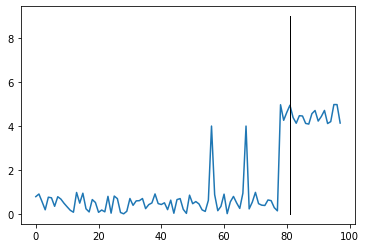

----------------- list 1 ----------------- 


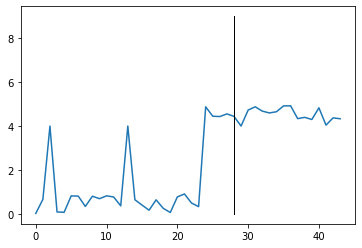

----------------- list 2 ----------------- 


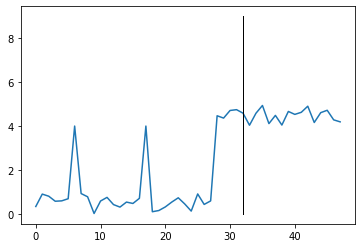

----------------- list 3 ----------------- 


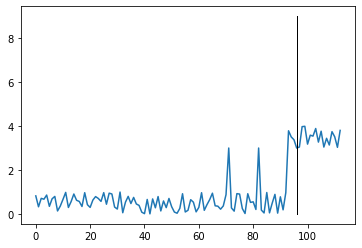

----------------- list 4 ----------------- 


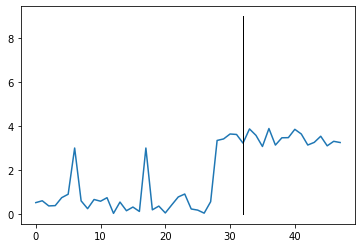

----------------- list 5 ----------------- 


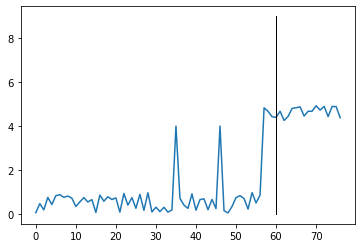

----------------- list 6 ----------------- 


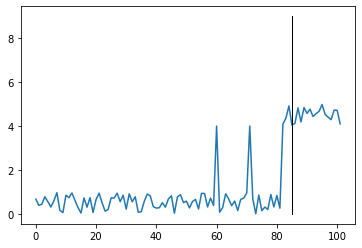

----------------- list 7 ----------------- 


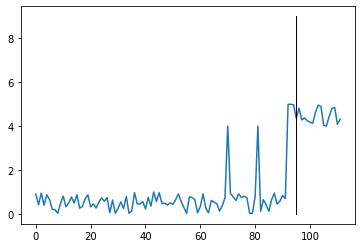

----------------- list 8 ----------------- 


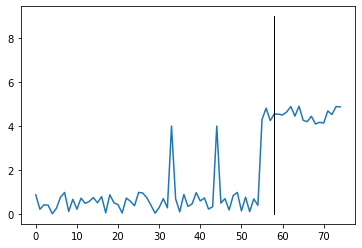

----------------- list 9 ----------------- 


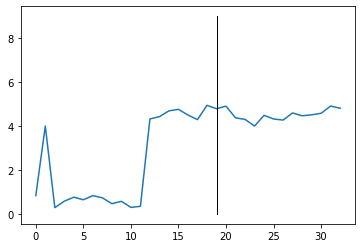

----------------- list 10 ----------------- 


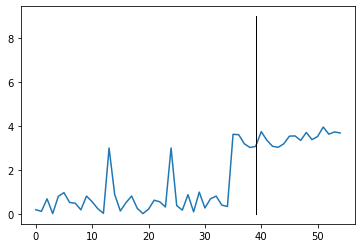

----------------- list 11 ----------------- 


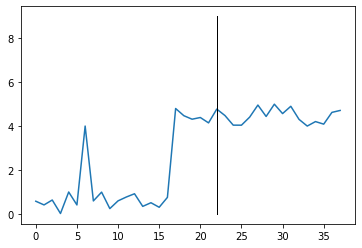

----------------- list 12 ----------------- 


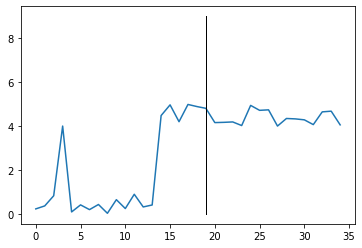

----------------- list 13 ----------------- 


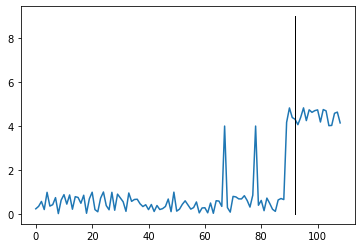

----------------- list 14 ----------------- 


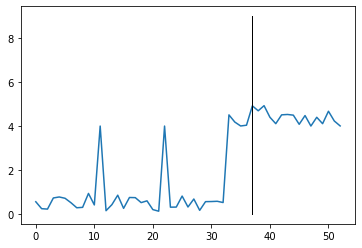


 Passed: test 2/2


In [9]:
## Test cell: `exercise3_1`
import matplotlib.pyplot as plt
import numpy as np
print("The list values and your point of change detection")
for i in range(15):
    change_index = np.random.randint(10,100)
    change_volume = np.random.randint(3,5)
    test_input = list(np.random.random(change_index))+ list(np.random.random(20)+change_volume)
    test_input.insert(change_index - 10, change_volume)
    test_input.insert(change_index - 20, change_volume)
    
    # Plot sequences
    print("----------------- list {} ----------------- ".format(i))
    plt.plot(test_input)
    your_ans = raise_alarm(test_input,change_volume*2)[0]
    plt.plot([your_ans]*10, range(10), 'k-', lw=1)
    plt.show()
    assert raise_alarm(test_input,change_volume*5)[0] >= change_index, print("You do not have the correct index of change")
    
print("\n Passed: test 2/2")

Let's take this one step further. 

In the previous exercises, we considered the mean of the list to be a constant value (or a known value) over all times. Such a random time series is said to be _stationary_. But there are cases when the system is non-stationary, where the mean value varies in time. This phenomenon occurs with, for instance, seasonal data, like when the average temperature depends on the time of year.

In this case, you might want a _dynamic CuSum_, that is, one that maintains a **moving average** that you update over time. For the last exercise in this notebook, let's implement a key piece of such a method.

**Exercise 4** (2 points). Write a function, `calc_mean_dynamic(L)`, that takes a list of values `L` and returns a new list, `mu`, where `mu[t]` is the average value of the **preceding four time points**, `L[t-4]`, `L[t-3]`, `L[t-2]`, and `L[t-1]`.

When `t < 4`, the preceding time points do not exist. Your computation should assume that they do and that their values are 0.

That is, consider this example:

```python
L = [1, 1, 2, 4, 6, 2, 1]
assert calc_mean_dynamic(L) == [0, 0.25, 0.5, 1, 2, 3.25, 3.5]
```

At `t=0`, there are no earlier time points. Therefore, the output should be $\frac{0+0+0+0}{4} = 0$. At `t=1`, there is only one preceding time point, `L[0]=1`. Therefore, the dynamic or moving average should be computed as $\frac{0+0+0+1}{4} = 0.25$. At `t=2`, it would be $\frac{0+0+1+1}{4} = 0.5$.

In [10]:
def calc_mean_dynamic(L):
    fill = [0, 0, 0, 0]
    L_padded = fill + L
    mu = []
    for i in range(len(L)):
        mu.append(calc_mean(L_padded[i:i+4]))
    return mu

In [11]:
# Test cell: `exercise4`

def check_exercise4(L, ans):
    from math import isclose
    print("Test case:")
    print("- Input      : {}".format(L))
    print("- True answer: {}".format(ans))
    your_ans = calc_mean_dynamic(L)
    print("- Your answer: {}".format(your_ans))
    assert len(ans) == len(your_ans), "Output lengths do not match!"
    for i, (a, b) in enumerate(zip(ans, your_ans)):
        assert isclose(a, b, rel_tol=1e-13), "Answers differ at position {}: {} vs. {}".format(i, a, b)
    print("")

# test 1
check_exercise4([1, 1, 2, 4, 6, 2, 1],
                [0, 0.25, 0.5, 1, 2, 3.25, 3.5])

# test 2
check_exercise4([36, 29, 28, 22, 5, 20, 39, 3, 40, 48, 47, 9, 0, 36, 31, 20, 13, 41, 10, 46],
                [0.0, 9.0, 16.25, 23.25, 28.75, 21.0, 18.75, 21.5, 16.75, 25.5, 32.5, 34.5, 36.0, 26.0, 23.0, 19.0, 21.75, 25.0, 26.25, 21.0])

# test 3
check_exercise4([39, 37, 17, 28, 36, 40, 35, 32, 23, 1, 38, 3, 33, 3, 47, 13, 24, 38, 14, 8],
                [0.0, 9.75, 19.0, 23.25, 30.25, 29.5, 30.25, 34.75, 35.75, 32.5, 22.75, 23.5, 16.25, 18.75, 19.25, 21.5, 24.0, 21.75, 30.5, 22.25])

# test 4
check_exercise4([1,1,2,4,2,4,6,8,9,1,2,3,1,2,1,5],
                [0.0, 0.25, 0.5, 1.0, 2.0, 2.25, 3.0, 4.0, 5.0, 6.75, 6.0, 5.0, 3.75, 1.75, 2.0, 1.75])

print("(Passed!)")

Test case:
- Input      : [1, 1, 2, 4, 6, 2, 1]
- True answer: [0, 0.25, 0.5, 1, 2, 3.25, 3.5]
- Your answer: [0.0, 0.25, 0.5, 1.0, 2.0, 3.25, 3.5]

Test case:
- Input      : [36, 29, 28, 22, 5, 20, 39, 3, 40, 48, 47, 9, 0, 36, 31, 20, 13, 41, 10, 46]
- True answer: [0.0, 9.0, 16.25, 23.25, 28.75, 21.0, 18.75, 21.5, 16.75, 25.5, 32.5, 34.5, 36.0, 26.0, 23.0, 19.0, 21.75, 25.0, 26.25, 21.0]
- Your answer: [0.0, 9.0, 16.25, 23.25, 28.75, 21.0, 18.75, 21.5, 16.75, 25.5, 32.5, 34.5, 36.0, 26.0, 23.0, 19.0, 21.75, 25.0, 26.25, 21.0]

Test case:
- Input      : [39, 37, 17, 28, 36, 40, 35, 32, 23, 1, 38, 3, 33, 3, 47, 13, 24, 38, 14, 8]
- True answer: [0.0, 9.75, 19.0, 23.25, 30.25, 29.5, 30.25, 34.75, 35.75, 32.5, 22.75, 23.5, 16.25, 18.75, 19.25, 21.5, 24.0, 21.75, 30.5, 22.25]
- Your answer: [0.0, 9.75, 19.0, 23.25, 30.25, 29.5, 30.25, 34.75, 35.75, 32.5, 22.75, 23.5, 16.25, 18.75, 19.25, 21.5, 24.0, 21.75, 30.5, 22.25]

Test case:
- Input      : [1, 1, 2, 4, 2, 4, 6, 8, 9, 1, 2, 3, 1, 2, 

***Fin!*** You've reached the end of this problem. Don't forget to restart the kernel and run the entire notebook from top-to-bottom to make sure you did everything correctly. If that is working, try submitting this problem. (Recall that you must submit and pass the autograder to get credit for your work!)